In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense,Dropout,Conv2D,MaxPool2D
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('c:/Users/jadha/Data/age_gender.csv')
df.shape

(23705, 5)

In [3]:
df.head()

,age,race,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
df.pixels=df.pixels.apply(lambda x: np.array(x.split(),'int32').reshape(48,48))

In [5]:
race=['White','Black','Ashian','Indian','Other']
df.race=df.race.apply(lambda x: race[x])

In [6]:
df.race.value_counts()

White     10078
Black      4526
Indian     3975
Ashian     3434
Other      1692
Name: race, dtype: int64

In [7]:
df.head()

,age,race,gender,img_name,pixels
0,1,Ashian,0,20161219203650636.jpg.chip.jpg,"[[129, 128, 128, 126, 127, 130, 133, 135, 139,..."
1,1,Ashian,0,20161219222752047.jpg.chip.jpg,"[[164, 74, 111, 168, 169, 171, 175, 182, 184, ..."
2,1,Ashian,0,20161219222832191.jpg.chip.jpg,"[[67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116..."
3,1,Ashian,0,20161220144911423.jpg.chip.jpg,"[[193, 197, 198, 200, 199, 200, 202, 203, 204,..."
4,1,Ashian,0,20161220144914327.jpg.chip.jpg,"[[202, 205, 209, 210, 209, 209, 210, 211, 212,..."


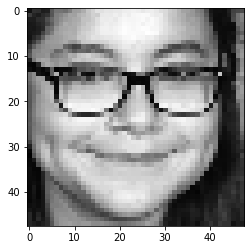

In [8]:
k=np.random.randint(0,23705)
k_df=pd.DataFrame(df.iloc[k])
px=df.pixels[k]
plt.imshow(px,cmap='gray')
# plt.title(k_df[2])
plt.show()

In [9]:
def show_images(rows,cols):
    plt.figure(figsize=[rows*3,cols*3])
    for i in range (1,rows*cols+1):
        plt.subplot(rows,cols,i)
        k=np.random.randint(0,23705)
        px=df.pixels[k]
        plt.imshow(px,cmap='gray')
        plt.title(f"Age:{df.age[k]}  Gender :{df.gender[k]} \n race : {df.race[k]}",color='r')
        plt.axis('off')
    plt.tight_layout()

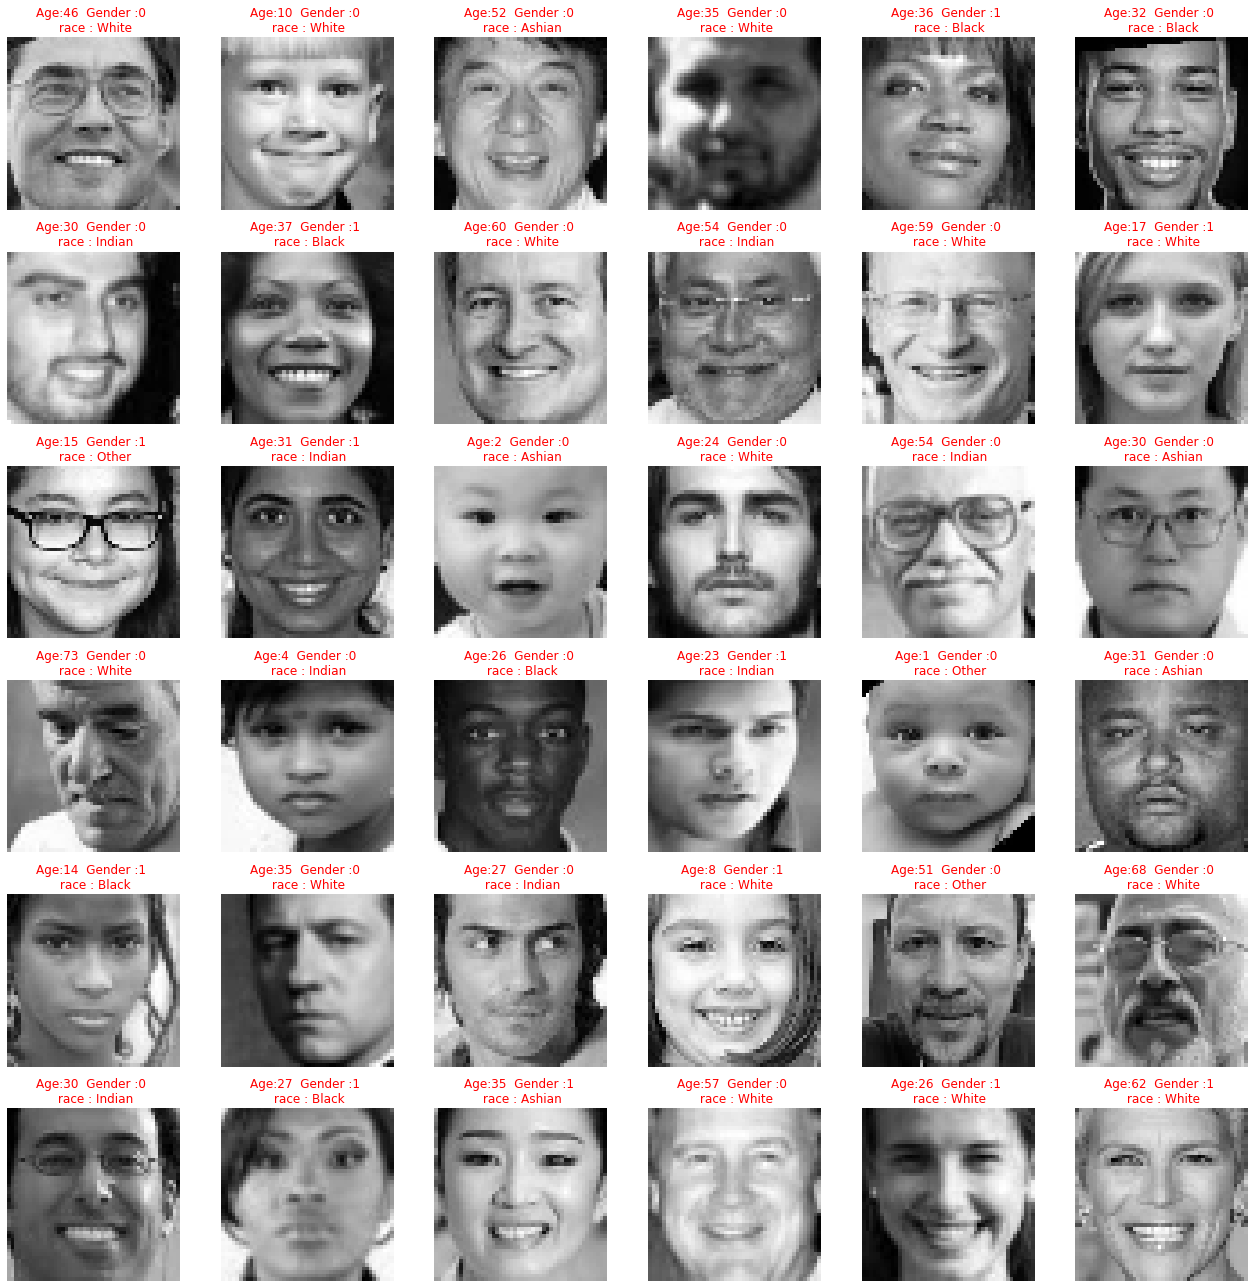

In [10]:
show_images(6,6)

In [11]:
x=np.zeros((23705,48,48))
x[0]
for i in range (23705):
    x[i]=df.pixels[i]/255

In [13]:
df.pixels[0]/255
x[0]

array([[0.50588235, 0.50196078, 0.50196078, ..., 0.4627451 , 0.38823529,
        0.20784314],
       [0.50980392, 0.50588235, 0.50196078, ..., 0.45882353, 0.38431373,
        0.20392157],
       [0.51372549, 0.50588235, 0.50980392, ..., 0.44705882, 0.38039216,
        0.19607843],
       ...,
       [0.4745098 , 0.54117647, 0.57647059, ..., 0.59215686, 0.58823529,
        0.58039216],
       [0.45882353, 0.5372549 , 0.57254902, ..., 0.58431373, 0.58039216,
        0.58039216],
       [0.45098039, 0.52941176, 0.55686275, ..., 0.57254902, 0.57254902,
        0.57254902]])

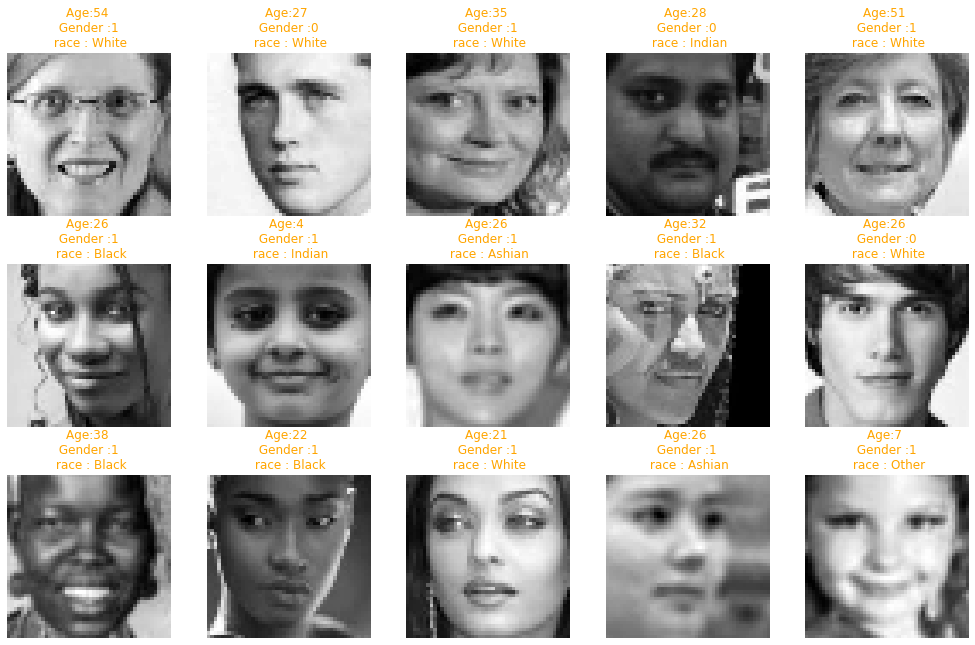

In [14]:
plt.figure(figsize=[14,9])
for i in range (1,16):
    plt.subplot(3,5,i)
    k=np.random.randint(0,23705)
    plt.imshow(x[k],cmap='gray')
    plt.title(f"Age:{df.age[k]} \n Gender :{df.gender[k]} \n race : {df.race[k]}",color='orange')
    plt.axis('off')
plt.tight_layout()

In [15]:
y=df['race']
y.shape

(23705,)

In [16]:
y=pd.get_dummies(y)
y.shape

(23705, 5)

In [17]:
model =Sequential()

#convolution and maxpoollayer
model.add(Conv2D(filters=32,kernel_size=3,
                 strides=1,padding='same',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))


model.add(Conv2D(filters=64,kernel_size=3,
                 strides=1,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))


model.add(Conv2D(filters=132,kernel_size=3,
                 strides=1,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))

#flatten layer
model.add(Flatten())

#hidden layer
model.add(Dense(64))
model.add(Activation('relu'))

#output layer
model.add(Dense(5))
model.add(Activation('softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=2000)
x_train.shape,x_test.shape

((21705, 48, 48), (2000, 48, 48))

In [20]:
start_time=datetime.now()
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=256)
end_time=datetime.now()
print(end_time-start_time)

Epoch 1/5
85/85 [==============================] - 44s 502ms/step - loss: 1.3157 - accuracy: 0.4753 - val_loss: 1.0966 - val_accuracy: 0.5750
Epoch 2/5
85/85 [==============================] - 41s 477ms/step - loss: 1.0212 - accuracy: 0.6226 - val_loss: 0.9452 - val_accuracy: 0.6615
Epoch 3/5
85/85 [==============================] - 40s 466ms/step - loss: 0.8952 - accuracy: 0.6804 - val_loss: 0.8282 - val_accuracy: 0.7135
Epoch 4/5
85/85 [==============================] - 40s 465ms/step - loss: 0.8017 - accuracy: 0.7203 - val_loss: 0.7536 - val_accuracy: 0.7405
Epoch 5/5
85/85 [==============================] - 38s 452ms/step - loss: 0.7247 - accuracy: 0.7467 - val_loss: 0.7369 - val_accuracy: 0.7425
0:03:22.205286


In [21]:
model.evaluate(x_train,y_train)

679/679 [==============================] - 10s 15ms/step - loss: 0.7005 - accuracy: 0.7552


[0.7005072832107544, 0.7552176713943481]

In [22]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 1s 14ms/step - loss: 0.7369 - accuracy: 0.7425


[0.7368711233139038, 0.7425000071525574]